In [1]:
import pygame

pygame 2.5.0 (SDL 2.28.0, Python 3.10.11)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
pygame.init()
pygame.font.init()

In [3]:
DARK_GREEN = (120, 148, 84)
LIGHT_GREEN = (240, 236, 212)
LABEL_COLOR = (20, 20, 20)

SCREEN_WIDTH, SCREEN_HEIGHT = 600, 600
BOARD_SIZE = 8
SQUARE_SIZE = SCREEN_WIDTH // BOARD_SIZE

In [4]:
ROWS = ['1', '2', '3', '4', '5', '6', '7', '8']
COLS = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

In [5]:
PIECES = {
    'K': '♔', 'Q': '♕', 'R': '♖',
    'B': '♗', 'N': '♘', 'P': '♙',
    'k': '♚', 'q': '♛', 'r': '♜',
    'b': '♝', 'n': '♞', 'p': '♟'
}

In [6]:
chessboard = {
    '1A': 'r', '1B': 'n', '1C': 'b', '1D': 'q', '1E': 'k', '1F': 'b', '1G': 'n', '1H': 'r',
    '2A': 'p', '2B': 'p', '2C': 'p', '2D': 'p', '2E': 'p', '2F': 'p', '2G': 'p', '2H': 'p',
    '3A': ' ', '3B': ' ', '3C': ' ', '3D': ' ', '3E': ' ', '3F': ' ', '3G': ' ', '3H': ' ',
    '4A': ' ', '4B': ' ', '4C': ' ', '4D': ' ', '4E': ' ', '4F': ' ', '4G': ' ', '4H': ' ',
    '5A': ' ', '5B': ' ', '5C': ' ', '5D': ' ', '5E': ' ', '5F': ' ', '5G': ' ', '5H': ' ',
    '6A': ' ', '6B': ' ', '6C': ' ', '6D': ' ', '6E': ' ', '6F': ' ', '6G': ' ', '6H': ' ',
    '7A': 'P', '7B': 'P', '7C': 'P', '7D': 'P', '7E': 'P', '7F': 'P', '7G': 'P', '7H': 'P',
    '8A': 'R', '8B': 'N', '8C': 'B', '8D': 'Q', '8E': 'K', '8F': 'B', '8G': 'N', '8H': 'R',
}

In [7]:
def draw_chessboard(screen):
    for row in range(BOARD_SIZE):
        for col in range(BOARD_SIZE):
            num = (row * BOARD_SIZE) + col + 1
            if (row + col) % 2 == 0:
                num = num if num % 2 != 0 else None
            else:
                num = num if num % 2 == 0 else None 

            color = DARK_GREEN if (row + col) % 2 == 0 else LIGHT_GREEN
            pygame.draw.rect(screen, color, (col * SQUARE_SIZE, row * SQUARE_SIZE, SQUARE_SIZE, SQUARE_SIZE))

            piece = chessboard.get(f"{row + 1}{COLS[col]}", None)
            if piece in PIECES:
                font = pygame.font.Font("DejaVuSans.ttf", 48)
                piece_unicode = PIECES[piece]
                label = font.render(piece_unicode, True, LABEL_COLOR)
                screen.blit(label, (col * SQUARE_SIZE + SQUARE_SIZE // 2 - label.get_width() // 2,
                                    row * SQUARE_SIZE + SQUARE_SIZE // 2 - label.get_height() // 2))

In [8]:
def main():
    pygame.init()
    screen = pygame.display.set_mode((SCREEN_WIDTH, SCREEN_HEIGHT))
    pygame.display.set_caption("Virtual Chessboard")
    clock = pygame.time.Clock()

    running = True
    while running:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False

        screen.fill(DARK_GREEN)
        draw_chessboard(screen)
        pygame.display.flip()
        clock.tick(60)

    pygame.quit()

In [9]:
if __name__ == "__main__":
    main()

KeyboardInterrupt: 

In [10]:
import os
import imgaug.augmenters as iaa
import imageio

In [11]:
def augment_image(image_paths, output_path, num_augmented_images=5):
    
    seq = iaa.Sequential([
        iaa.Fliplr(0.5),         # Horizontal flip
        iaa.Flipud(0.5),         # Vertical flip
        iaa.Rotate((-45, 45)),   # Rotation
        iaa.GaussianBlur(sigma=(0, 1.0)),  # Gaussian blur
        iaa.AdditiveGaussianNoise(scale=(0, 0.05 * 255)),  # Gaussian noise
        iaa.Affine(scale=(0.5, 1.5)),   # Scale
        iaa.Crop(percent=(0, 0.2)),    # Crop
    ])

    for image_path in image_paths:
        image = imageio.imread(image_path)

        images_aug = seq.augment_images([image] * num_augmented_images)
        for i, image_aug in enumerate(images_aug):
            imageio.imwrite(os.path.join(output_path, f"augmented_{os.path.basename(image_path)}_{i}.jpg"), image_aug)

In [12]:
def augment_dataset(dataset_path, output_path, num_augmented_images=5):
    
    for piece_type in os.listdir(dataset_path):
        piece_folder = os.path.join(dataset_path, piece_type)
        if os.path.isdir(piece_folder):
            augmented_piece_folder = os.path.join(output_path, piece_type)
            os.makedirs(augmented_piece_folder, exist_ok=True)
            image_paths = [os.path.join(piece_folder, image_name) for image_name in os.listdir(piece_folder)]
            augment_image(image_paths, augmented_piece_folder, num_augmented_images)

In [13]:
if __name__ == "__main__":
    dataset_path = r'C:\Users\DARSHI\Desktop\Week 04 & 05\CV\chess_pieces\train'
    output_path = r'C:\Users\DARSHI\Desktop\Week 04 & 05\CV\Augmented_Dataset' 
    num_augmented_images = 5
    augment_dataset(dataset_path, output_path, num_augmented_images)

C:\Users\DARSHI\AppData\Local\Temp\ipykernel_13204\572382037.py:14: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(image_path)


In [14]:
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
train_data_dir = r'C:\Users\DARSHI\Desktop\Week 04 & 05\CV\Augmented_Dataset'

In [16]:
num_classes = 12
image_size = (181, 181)

In [17]:
train_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2)

In [18]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 9216 images belonging to 12 classes.


In [19]:
validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 2304 images belonging to 12 classes.


In [20]:
dense_layers = [1, 2]
layer_sizes = [64, 128]
conv_layers = [3, 4]

In [21]:
for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, (3, 3), input_shape=(181, 181, 3), kernel_regularizer=l2(0.01)))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for _ in range(conv_layer - 1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())

            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))
                model.add(Dropout(0.5))

            model.add(Dense(num_classes))
            model.add(Activation('softmax'))

            tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

            model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

            model.fit(train_generator, epochs=20, validation_data=validation_generator, callbacks=[tensorboard])

3-conv-64-nodes-1-dense-1690447809
Epoch 1/20
288/288 [==============================] - 338s 1s/step - loss: 2.1301 - accuracy: 0.1698 - val_loss: 1.8955 - val_accuracy: 0.1962
Epoch 2/20
288/288 [==============================] - 330s 1s/step - loss: 1.8730 - accuracy: 0.2330 - val_loss: 1.8298 - val_accuracy: 0.2214
Epoch 3/20
288/288 [==============================] - 307s 1s/step - loss: 1.7655 - accuracy: 0.2727 - val_loss: 1.8765 - val_accuracy: 0.2257
Epoch 4/20
288/288 [==============================] - 306s 1s/step - loss: 1.6518 - accuracy: 0.3192 - val_loss: 1.8123 - val_accuracy: 0.2661
Epoch 5/20
288/288 [==============================] - 305s 1s/step - loss: 1.5598 - accuracy: 0.3568 - val_loss: 1.7682 - val_accuracy: 0.2739
Epoch 6/20
288/288 [==============================] - 298s 1s/step - loss: 1.4931 - accuracy: 0.3812 - val_loss: 1.8057 - val_accuracy: 0.2812
Epoch 7/20
288/288 [==============================] - 312s 1s/step - loss: 1.4298 - accuracy: 0.4102 - val_

288/288 [==============================] - 280s 972ms/step - loss: 1.7522 - accuracy: 0.2363 - val_loss: 1.8303 - val_accuracy: 0.2066
Epoch 14/20
288/288 [==============================] - 279s 968ms/step - loss: 1.7353 - accuracy: 0.2577 - val_loss: 1.8481 - val_accuracy: 0.2205
Epoch 15/20
288/288 [==============================] - 279s 970ms/step - loss: 1.7220 - accuracy: 0.2560 - val_loss: 1.8001 - val_accuracy: 0.2357
Epoch 16/20
288/288 [==============================] - 280s 973ms/step - loss: 1.6715 - accuracy: 0.2796 - val_loss: 1.7798 - val_accuracy: 0.2578
Epoch 17/20
288/288 [==============================] - 280s 973ms/step - loss: 1.6366 - accuracy: 0.2943 - val_loss: 1.8110 - val_accuracy: 0.2552
Epoch 18/20
288/288 [==============================] - 278s 967ms/step - loss: 1.6090 - accuracy: 0.3129 - val_loss: 1.8222 - val_accuracy: 0.2309
Epoch 19/20
288/288 [==============================] - 278s 965ms/step - loss: 1.5703 - accuracy: 0.3287 - val_loss: 1.7765 - val_

In [22]:
import numpy as np

In [23]:
accuracies = [0.5913, 0.5562, 0.6120, 0.7280, 0.4076, 0.3418, 0.4117, 0.5091]
accuracy_dict = {
    (1, 64, 3): accuracies[0],
    (1, 64, 4): accuracies[1],
    (1, 128, 3): accuracies[2],
    (1, 128, 4): accuracies[3],
    (2, 64, 3): accuracies[4],
    (2, 64, 4): accuracies[5],
    (2, 128, 3): accuracies[6],
    (2, 128, 4): accuracies[7]
}
weight_factor = 2
overall_accuracy = np.mean([accuracy_dict[key] if key[1] != 128 else accuracy_dict[key] * weight_factor for key in accuracy_dict])
print("Overall Accuracy:", overall_accuracy)

Overall Accuracy: 0.8023125


In [24]:
val_accuracies = [0.3537, 0.1979, 0.3012, 0.4180, 0.3077, 0.2717, 0.2678, 0.3919]
val_accuracy_dict = {
    (1, 64, 3): val_accuracies[0],
    (1, 64, 4): val_accuracies[1],
    (1, 128, 3): val_accuracies[2],
    (1, 128, 4): val_accuracies[3],
    (2, 64, 3): val_accuracies[4],
    (2, 64, 4): val_accuracies[5],
    (2, 128, 3): val_accuracies[6],
    (2, 128, 4): val_accuracies[7]
}
weight_factor = 2
overall_val_accuracy = np.mean([val_accuracy_dict[key] if key[1] != 128 else val_accuracy_dict[key] * weight_factor for key in val_accuracy_dict])
print("Overall Validation Accuracy:", overall_val_accuracy)

Overall Validation Accuracy: 0.4861


In [25]:
model.save('chess_piece_recognition.model')

INFO:tensorflow:Assets written to: chess_piece_recognition.model\assets


INFO:tensorflow:Assets written to: chess_piece_recognition.model\assets


In [3]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 179, 179, 128)     3584      
                                                                 
 activation_41 (Activation)  (None, 179, 179, 128)     0         
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 89, 89, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 87, 87, 128)       147584    
                                                                 
 activation_42 (Activation)  (None, 87, 87, 128)       0         
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 43, 43, 128)      0         
 g2D)                                                 

In [1]:
import tensorflow as tf

In [2]:
model = tf.keras.models.load_model(r'C:\Users\DARSHI\Desktop\Week 04 & 05\CV\chess_piece_recognition.model')

In [3]:
import numpy as np
import cv2
import pygame
import matplotlib.pyplot as plt

pygame 2.5.0 (SDL 2.28.0, Python 3.10.11)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [4]:
classes = ['black_bishop', 'black_king', 'black_knight', 'black_pawn', 'black_queen', 'black_rook',
           'white_bishop', 'white_king', 'white_knight', 'white_pawn', 'white_queen', 'white_rook']

In [5]:
def preprocess_image(image):
    image = cv2.resize(image, (181, 181))
    image = np.expand_dims(image, axis=0)
    image = image / 255.0
    return image

In [6]:
def predict_chess_piece(image):
    preprocessed_image = preprocess_image(image)
    predictions = model.predict(preprocessed_image)
    predicted_class = classes[np.argmax(predictions)]
    return predicted_class

In [7]:
def capture_image():
    cap = cv2.VideoCapture(0)
    ret, frame = cap.read()
    cap.release()
    return frame

In [8]:
def main():
    while True:
        image = capture_image()

        predicted_class = predict_chess_piece(image)

        image_with_prediction = image.copy()
        cv2.putText(image_with_prediction, predicted_class, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

        image_rgb = cv2.cvtColor(image_with_prediction, cv2.COLOR_BGR2RGB)

        plt.imshow(image_rgb)
        plt.show()

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cv2.destroyAllWindows()

1/1 [==============================] - 0s 58ms/step


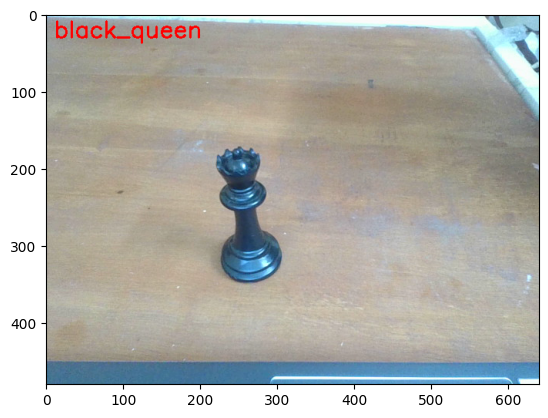

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1338: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvWaitKey'


In [12]:
if __name__ == "__main__":
    main()